In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


Matplotlib created a temporary config/cache directory at /localscratch/133995/matplotlib-qmthg_zz because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [26]:
def plot_run_time(filename):
    
    df = pd.read_csv(filename, index_col=0,sep=' ')
    
    fig = plt.figure()
    ax = plt.gca()
    
    P = df['n_threads'].to_numpy().astype(np.int)
    
    time = df['t_total'].to_numpy().astype(np.float32)
    label = 'Time'
    ax.loglog(P, time, label=label)
    
    plt.legend()
    plt.title("run-time for" + " " + filename)
    plt.xlabel("P")
    plt.ylabel("Avg. Run Time (s)")
    
    return fig

def plot_speedup(filename):
    df = pd.read_csv(filename, index_col=0,sep=' ')
    
    fig = plt.figure()
    ax = plt.gca()
    
    strong = "strong" in filename
    exp_type = "strong" if strong else "weak"
    
    P = df['n_threads'].to_numpy().astype(np.int)
    plt.loglog(P, P, label="ideal speedup", color="black",linestyle="--")
    
    time = df['t_total'].to_numpy().astype(np.float32)
    T_s = np.float32(df['t_total'].iloc[1])
    
    if strong:
        T_1 = T_s
    else:
        T_1 = np.sqrt(P) * T_s
    S_P = T_1 / P
    
    label = 'Time'
    
    ax.loglog(P, S_P, label=label)
    
    plt.legend()
    plt.title("speedup for" + " " + filename)
    plt.xlabel("P")
    plt.ylabel("S")
    
    return fig

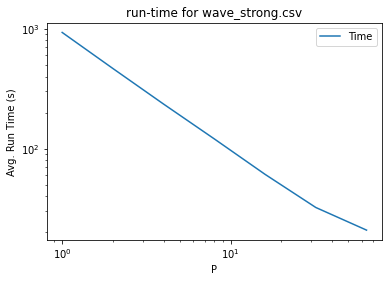

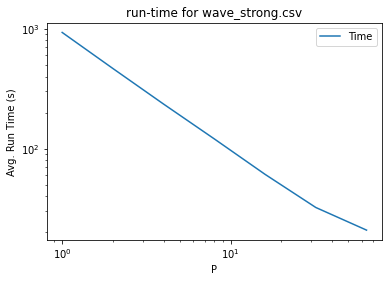

In [18]:
plot_run_time("wave_strong.csv")

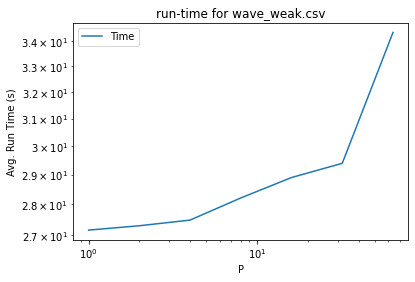

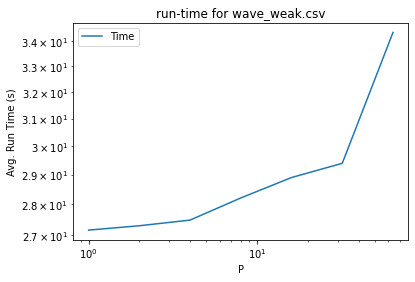

In [19]:
plot_run_time("wave_weak.csv")

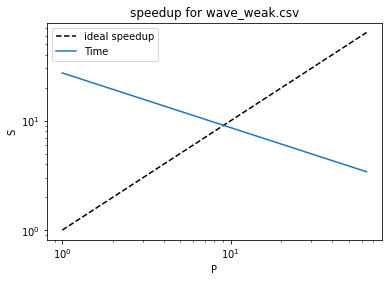

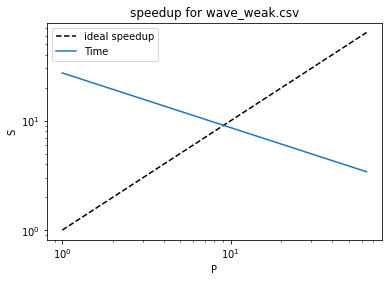

In [20]:
plot_speedup("wave_weak.csv")

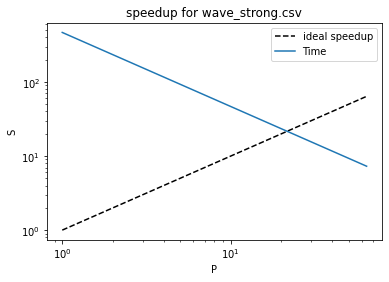

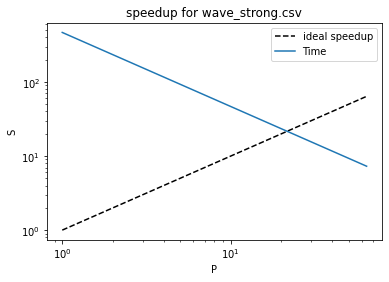

In [21]:
plot_speedup("wave_strong.csv")

In [5]:
wave1 = pd.read_csv("time_wave_64.csv", index_col=0,sep=' ')
wave2 = pd.read_csv("time_wave_128.csv", index_col=0,sep=' ')

Text(0, 0.5, 'Run-time (s)')

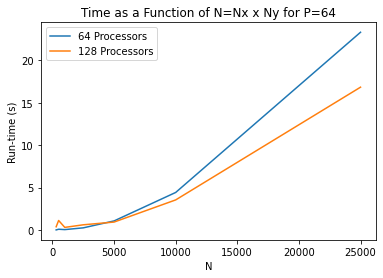

In [6]:
wave1
fig = plt.figure()
ax = plt.gca()
label1 = '64 Processors'
label2 = "128 Processors"
ax.plot(wave1.index, wave1['t_total'], label=label1)
ax.plot(wave2.index, wave2['t_total'], label=label2)


plt.legend()
plt.title("Time as a Function of N=Nx x Ny for P=64")
plt.xlabel("N")
plt.ylabel("Run-time (s)")